In [1]:
# Imports
import pandas as pd


In [2]:
df = pd.read_csv('../data/Oscar_Nominations_Winners.csv')

In [3]:
df.head()

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,144.0,1927,"Drama, Romance, War, Action",15336,1929-01-05,"William A. Wellman, Harry d'Abbadie d'Arrast"
1,2,tt0019304,2021-03-25,2021-03-25,NaN,The Racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,84.0,1928,"Crime, Drama, Film-Noir",1727,1928-11-01,Lewis Milestone
2,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,110.0,1927,"Drama, Romance",4403,1927-10-30,Frank Borzage
3,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,94.0,1927,"Drama, Romance",55269,1927-11-04,F.W. Murnau
4,5,tt0017743,2021-03-25,2021-03-25,NaN,Chang: A Drama of the Wilderness,Chang: A Drama of the Wilderness,https://www.imdb.com/title/tt0017743/,Movie,6.8,69.0,1927,"Documentary, Adventure, Drama",1188,1927-09-03,"Merian C. Cooper, Ernest B. Schoedsack"


In [4]:
df.shape

(5163, 16)

In [5]:
df.dtypes

Position            int64
Const              object
Created            object
Modified           object
Description        object
Title              object
Original Title     object
URL                object
Title Type         object
IMDb Rating       float64
Runtime (mins)    float64
Year                int64
Genres             object
Num Votes           int64
Release Date       object
Directors          object
dtype: object

In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Month'] = df['Release Date'].dt.month
df['Release Quarter'] = df['Release Date'].dt.quarter

In [7]:
df.head()

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Release Month,Release Quarter
0,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,144.0,1927,"Drama, Romance, War, Action",15336,1929-01-05,"William A. Wellman, Harry d'Abbadie d'Arrast",1.0,1.0
1,2,tt0019304,2021-03-25,2021-03-25,NaN,The Racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,84.0,1928,"Crime, Drama, Film-Noir",1727,1928-11-01,Lewis Milestone,11.0,4.0
2,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,110.0,1927,"Drama, Romance",4403,1927-10-30,Frank Borzage,10.0,4.0
3,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,94.0,1927,"Drama, Romance",55269,1927-11-04,F.W. Murnau,11.0,4.0
4,5,tt0017743,2021-03-25,2021-03-25,NaN,Chang: A Drama of the Wilderness,Chang: A Drama of the Wilderness,https://www.imdb.com/title/tt0017743/,Movie,6.8,69.0,1927,"Documentary, Adventure, Drama",1188,1927-09-03,"Merian C. Cooper, Ernest B. Schoedsack",9.0,3.0


In [8]:
# Replace NaN with empty string and ensure all entries are strings
df['Genres List'] = df['Genres'].fillna('').astype(str).str.split(', ')

In [9]:
# Split genres into lists
#df['Genres List'] = df['Genres'].str.split(', ')

# One-hot encode
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['Genres List']),
                             columns=mlb.classes_,
                             index=df.index)
df = pd.concat([df, genre_dummies], axis=1)

In [10]:
df.head()

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,...,0,0,1,0,0,0,0,0,1,0
1,2,tt0019304,2021-03-25,2021-03-25,NaN,The Racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,...,0,0,0,0,0,0,0,0,0,0
2,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,0,0,1,0,0,0,0,0,0,0
3,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,...,0,0,1,0,0,0,0,0,0,0
4,5,tt0017743,2021-03-25,2021-03-25,NaN,Chang: A Drama of the Wilderness,Chang: A Drama of the Wilderness,https://www.imdb.com/title/tt0017743/,Movie,6.8,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df['Title Type'].value_counts()

Title Type
Movie         3851
Short         1279
TV Movie        14
TV Episode      12
Video            3
TV Short         2
TV Series        2
Name: count, dtype: int64

In [12]:
df['IMDb Popularity'] = df['IMDb Rating'] * df['Num Votes']

In [13]:
df['Num Directors'] = df['Directors'].fillna('').astype(str).str.split(',').apply(len)

In [14]:
def count_directors(director_entry):
    if isinstance(director_entry, str):
        return len(director_entry.split(','))
    else:
        return 0  # If it's NaN or not a string

df['Num Directors'] = df['Directors'].apply(count_directors)

In [15]:
df.head(20)

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,IMDb Popularity,Num Directors
0,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,...,1,0,0,0,0,0,1,0,115020.0,2
1,2,tt0019304,2021-03-25,2021-03-25,NaN,The Racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,...,0,0,0,0,0,0,0,0,11398.2,1
2,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,0,0,0,0,0,0,0,33022.5,1
3,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,...,1,0,0,0,0,0,0,0,447678.9,1
4,5,tt0017743,2021-03-25,2021-03-25,NaN,Chang: A Drama of the Wilderness,Chang: A Drama of the Wilderness,https://www.imdb.com/title/tt0017743/,Movie,6.8,...,0,0,0,0,0,0,0,0,8078.4,2
5,6,tt0018515,2021-03-25,2021-03-25,NaN,Two Arabian Knights,Two Arabian Knights,https://www.imdb.com/title/tt0018515/,Movie,6.6,...,1,0,0,0,0,0,0,0,7986.0,1
6,7,tt0018773,2021-03-25,2021-03-25,NaN,The Circus,The Circus,https://www.imdb.com/title/tt0018773/,Movie,8.1,...,1,0,0,0,0,0,0,0,301716.9,1
7,8,tt0019412,2021-03-25,2021-03-25,NaN,Speedy,Speedy,https://www.imdb.com/title/tt0019412/,Movie,7.6,...,0,0,0,0,0,0,0,0,34587.6,1
8,9,tt0018429,2021-03-25,2021-03-25,NaN,Sorrell and Son,Sorrell and Son,https://www.imdb.com/title/tt0018429/,Movie,5.9,...,0,0,0,0,0,0,0,0,507.4,1
9,10,tt0018806,2021-03-25,2021-03-25,NaN,The Crowd,The Crowd,https://www.imdb.com/title/tt0018806/,Movie,8.1,...,1,0,0,0,0,0,0,0,77954.4,1


In [16]:
df1 = pd.read_csv('../data/master_oscar.csv', encoding='latin-1')

In [17]:
df1.head(40)

,ceremony_year,ceremony,award_category,name,film,status
0,2025,97th,Actor in a Leading Role,Adrien Brody,The Brutalist,Won
1,2025,97th,Actor in a Supporting Role,Kieran Culkin,A Real Pain,Won
2,2025,97th,Actress in a Leading Role,Mikey Madison,Anora,Won
3,2025,97th,Actress in a Supporting Role,Zoe Saldaa,Emilia Perez,Won
4,2025,97th,Animated Feature Film,"Gints Zilbalodis, Mat_ss Ka_a, Ron Dyens and G...",Flow,Won
5,2025,97th,Animated Short Film,Shirin Sohani and Hossein Molayemi,In the Shadow of the Cypress,Won
6,2025,97th,Cinematography,Lol Crawley,The Brutalist,Won
7,2025,97th,Costume Design,Paul Tazewell,Wicked,Won
8,2025,97th,Directing,Sean Baker,Anora,Won
9,2025,97th,Documentary Feature Film,"Basel Adra, Rachel Szor, Hamdan Ballal and Yuv...",No Other Land,Won


In [18]:
pd.set_option("display.max_rows", None)

In [19]:
df1['award_category'].value_counts()

award_category
Directing                                                                                                                                    474
Film Editing                                                                                                                                 455
Actress In a Supporting Role                                                                                                                 440
Actor In a Supporting Role                                                                                                                   440
Documentary (Short Subject)                                                                                                                  378
Best Picture                                                                                                                                 371
Documentary (Feature)                                                                                              

In [20]:
df1['ceremony_year'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949,
       1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938,
       1937, 1936, 1935, 1933, 1932, 1931, 1930, 1929, 1928])

In [21]:
df['Title_clean'] = df['Title'].fillna('').str.lower().str.strip()
df['Year'] = df['Year'].astype(int)

In [22]:
df1['film_clean'] = df1['film'].fillna('').str.lower().str.strip()
df1['ceremony_year'] = df1['ceremony_year'].astype(int)

In [23]:
df_combined = pd.merge(
    df,
    df1,
    how='left',  # Or 'inner' if you only want Oscar-nominated films
    left_on=['Title_clean'],
    right_on=['film_clean']
)

In [24]:
df_combined.tail(30)

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,...,IMDb Popularity,Num Directors,Title_clean,ceremony_year,ceremony,award_category,name,film,status,film_clean
10899,5137,tt30294282,2025-03-14,2025-03-14,NaN,Porcelain War,Porcelain War,https://www.imdb.com/title/tt30294282/,Movie,7.1,...,8307.0,2,porcelain war,2025.0,97th,Documentary Feature Film,"Brendan Bellomo, Slava Leontyev, Aniela Sidors...",Porcelain War,Nominated,porcelain war
10900,5138,tt14452174,2025-03-14,2025-03-14,NaN,Soundtrack to a Coup d'Etat,Soundtrack to a Coup d'Etat,https://www.imdb.com/title/tt14452174/,Movie,7.7,...,20967.1,1,soundtrack to a coup d'etat,2025.0,97th,Documentary Feature Film,"Johan Grimonprez, Daan Milius and Remi Grellety",Soundtrack to a Coup d'Etat,Nominated,soundtrack to a coup d'etat
10901,5139,tt30319854,2025-03-14,2025-03-14,NaN,Sugarcane,Sugarcane,https://www.imdb.com/title/tt30319854/,Movie,7.0,...,22575.0,2,sugarcane,2025.0,97th,Documentary Feature Film,"Julian Brave NoiseCat, Emily Kassie and Kellen...",Sugarcane,Nominated,sugarcane
10902,5140,tt29497240,2025-03-14,2025-03-14,NaN,The Only Girl in the Orchestra,The Only Girl in the Orchestra,https://www.imdb.com/title/tt29497240/,Short,6.6,...,17206.2,1,the only girl in the orchestra,2025.0,97th,Documentary Short Film,Molly OÕBrien and Lisa Remington,The Only Girl in the Orchestra,Won,the only girl in the orchestra
10903,5141,tt33385063,2025-03-14,2025-03-14,NaN,Death by Numbers,Death by Numbers,https://www.imdb.com/title/tt33385063/,Short,6.6,...,3194.4,1,death by numbers,2025.0,97th,Documentary Short Film,Kim A. Snyder and Janique L. Robillard,Death by Numbers,Nominated,death by numbers
10904,5142,tt31556921,2025-03-14,2025-03-14,NaN,"I am Ready, Warden","I am Ready, Warden",https://www.imdb.com/title/tt31556921/,Short,6.7,...,7162.3,1,"i am ready, warden",2025.0,97th,Documentary Short Film,Smriti Mundhra and Maya Gnyp,"I Am Ready, Warden",Nominated,"i am ready, warden"
10905,5143,tt27990245,2025-03-14,2025-03-14,NaN,Incident,Incident,https://www.imdb.com/title/tt27990245/,Short,7.6,...,8489.2,1,incident,2025.0,97th,Documentary Short Film,Bill Morrison and Jamie Kalven,Incident,Nominated,incident
10906,5144,tt32280470,2025-03-14,2025-03-14,NaN,Instruments of a Beating Heart,Instruments of a Beating Heart,https://www.imdb.com/title/tt32280470/,Short,7.0,...,9205.0,1,instruments of a beating heart,2025.0,97th,Documentary Short Film,Ema Ryan Yamazaki and Eric Nyari,Instruments of a Beating Heart,Nominated,instruments of a beating heart
10907,5145,tt19837932,2025-03-14,2025-03-14,NaN,I'm Not a Robot,Ik ben geen robot,https://www.imdb.com/title/tt19837932/,Short,7.1,...,23295.1,1,i'm not a robot,2025.0,97th,Live Action Short Film,Victoria Warmerdam and Trent,I'm Not a Robot,Won,i'm not a robot
10908,5146,tt27655666,2025-03-14,2025-03-14,NaN,A Lien,A Lien,https://www.imdb.com/title/tt27655666/,Short,7.2,...,9259.2,2,a lien,2025.0,97th,Live Action Short Film,Sam Cutler-Kreutz and David Cutler-Kreutz,A Lien,Nominated,a lien


In [25]:
df_combined['Title Type'].value_counts()

Title Type
Movie         9577
Short         1319
TV Movie        14
TV Episode      12
Video            3
TV Short         2
TV Series        2
Name: count, dtype: int64

In [26]:
df_combined.isnull().sum()

Position               0
Const                  0
Created                0
Modified               0
Description        10927
Title                  0
Original Title         0
URL                    0
Title Type             0
IMDb Rating           77
Runtime (mins)        12
Year                   0
Genres                 1
Num Votes              0
Release Date         836
Directors             75
Release Month        836
Release Quarter      836
Genres List            0
                       0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
Romance                0
Sci-Fi                 0
Short                  0


In [27]:
df_combined['Oscar_Winner'] = df_combined['status'].eq('Won').astype(int)

In [28]:
#df_combined = df_combined.drop(['Description', 'URL', 'Genres', 'Directors', 'ceremony_year', 'ceremony', 'name', 'film_clean', '', 'Created', 'Modified', 'status', 'Original Title', 'Title_clean', 'Genres List', ], axis=1)

In [29]:
df_combined.shape

(10929, 56)

In [30]:
df_combined.head(30)

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,...,Num Directors,Title_clean,ceremony_year,ceremony,award_category,name,film,status,film_clean,Oscar_Winner
0,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,...,2,wings,1928.0,1st,Engineering Effects,Roy Pomeroy,Wings,Won,wings,1
1,1,tt0018578,2021-03-25,2021-03-25,NaN,Wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,...,2,wings,1928.0,1st,Outstanding Picture,Paramount Famous Lasky,Wings,Won,wings,1
2,2,tt0019304,2021-03-25,2021-03-25,NaN,The Racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,...,1,the racket,1928.0,1st,Outstanding Picture,The Caddo Company,The Racket,Nominated,the racket,0
3,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,7th heaven,1928.0,1st,Actress,Janet Gaynor,7th Heaven,Won,7th heaven,1
4,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,7th heaven,1928.0,1st,Art Direction,Harry Oliver,7th Heaven,Nominated,7th heaven,0
5,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,7th heaven,1928.0,1st,Directing (Dramatic Picture),Frank Borzage,7th Heaven,Won,7th heaven,1
6,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,7th heaven,1928.0,1st,Outstanding Picture,Fox,7th Heaven,Nominated,7th heaven,0
7,3,tt0018379,2021-03-25,2021-03-25,NaN,7th Heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,...,1,7th heaven,1928.0,1st,Writing (Adaptation),Benjamin Glazer,7th Heaven,Won,7th heaven,1
8,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,...,1,sunrise,1928.0,1st,Art Direction,Rochus Gliese,Sunrise,Nominated,sunrise,0
9,4,tt0018455,2021-03-25,2021-03-25,NaN,Sunrise,Sunrise: A Song of Two Humans,https://www.imdb.com/title/tt0018455/,Movie,8.1,...,1,sunrise,1928.0,1st,Cinematography,Charles Rosher,Sunrise,Won,sunrise,1


In [31]:
# Map award categories into broader groups
award_mapping = {
    "Directing": "Directing",
    "Actor In a Leading Role": "Acting",
    "Actor In a Supporting Role": "Acting",
    "Actress In a Leading Role": "Acting",
    "Actress In a Supporting Role": "Acting",
    "Actor": "Acting",
    "Actress": "Acting",
    "Best Picture": "Picture",
    "Outstanding Picture": "Picture",
    "Outstanding Production": "Picture",
    "Best Motion Picture": "Picture",
    "Outstanding Motion Picture": "Picture",
    "Cinematography": "Cinematography",
    "Cinematography (Black-And-White)": "Cinematography",
    "Cinematography (Color)": "Cinematography",
    "Film Editing": "Editing",
    "Costume Design": "Costume Design",
    "Costume Design (Color)": "Costume Design",
    "Costume Design (Black-And-White)": "Costume Design",
    "Documentary (Feature)": "Documentary",
    "Documentary (Short Subject)": "Documentary",
    "Documentary": "Documentary",
    "Documentary Feature Film": "Documentary",
    "Documentary Short Film": "Documentary",
    "Music (Original Score)": "Music",
    "Music (Original Song)": "Music",
    "Music (Song)": "Music",
    "Music": "Music",
    "Sound": "Sound",
    "Sound Mixing": "Sound",
    "Sound Editing": "Sound",
    "Sound Effects": "Sound",
    "Sound Recording": "Sound",
    "Writing (Original Screenplay)": "Writing",
    "Writing (Adapted Screenplay)": "Writing",
    "Writing": "Writing",
    "Visual Effects": "Visual Effects",
    "Special Effects": "Visual Effects",
    "Animated Feature Film": "Animation",
    "Animated Short Film": "Animation",
    "Short Subject (Cartoon)": "Animation",
    "Short Subject (Animated)": "Animation",
    "Short Film (Animated)": "Animation",
    "Foreign Language Film": "International Feature",
    "International Feature Film": "International Feature",
    "Live Action Short Film": "Short Film",
    "Short Subject (Live Action)": "Short Film",
    "Short Film (Dramatic Live Action)": "Short Film",
    "Production Design": "Production Design",
    "Art Direction": "Production Design",
    "Art Direction (Black-And-White)": "Production Design",
    "Art Direction (Color)": "Production Design",
    "Makeup": "Makeup and Hairstyling",
    "Makeup and Hairstyling": "Makeup and Hairstyling",
    "Special Achievement Award (Visual Effects)": "Visual Effects",
    "Engineering Effects": "Other"
}
df_combined["award_category_grouped"] = df_combined["award_category"].map(award_mapping).fillna("Other")

# One-hot encode grouped categories
award_dummies = pd.get_dummies(df_combined["award_category_grouped"], prefix="award")

# Combine dummies with original dataframe
df_with_dummies = pd.concat([df_combined, award_dummies], axis=1)

In [32]:
# List of dummy columns to sum per film
dummy_cols = award_dummies.columns.tolist()

# Define aggregation dictionary
agg_dict = {
    'Oscar_Winner': 'max',
    'award_category': 'count',
    'Title': 'first',
    'IMDb Rating': 'first',
    'Runtime (mins)': 'first',
    'Year': 'first',
    'Num Votes': 'first',
    'IMDb Popularity': 'first',
    'Num Directors': 'first',
    'Comedy': 'first',
    'Romance': 'first',
    'Drama': 'first',
    'War': 'first',
    'Adventure': 'first',
}

# Add dummy aggregations (summing over each film)
for col in dummy_cols:
    agg_dict[col] = 'sum'

# Apply groupby
df_rolled = df_with_dummies.groupby('film', as_index=False).agg(agg_dict)

# Rename award_category count column for clarity
df_rolled.rename(columns={'award_category': 'num_nominations'}, inplace=True)


In [66]:
df_rolled.shape

(4572, 32)

In [68]:
df_rolled.head(40)

,film,Oscar_Winner,num_nominations,Title,IMDb Rating,Runtime (mins),Year,Num Votes,IMDb Popularity,Num Directors,...,award_International Feature,award_Makeup and Hairstyling,award_Music,award_Other,award_Picture,award_Production Design,award_Short Film,award_Sound,award_Visual Effects,award_Writing
0,'Round Midnight,1,2,'Round Midnight,7.4,133.0,1986,6086,45036.4,1,...,0,0,1,0,0,0,0,0,0,0
1,10,0,2,10,6.1,122.0,1979,19854,121109.4,1,...,0,0,2,0,0,0,0,0,0,0
2,102 Dalmatians,0,1,102 Dalmatians,4.9,100.0,2000,40686,199361.4,1,...,0,0,0,0,0,0,0,0,0,0
3,12,0,1,12,7.5,159.0,2007,15671,117532.5,1,...,1,0,0,0,0,0,0,0,0,0
4,12 Angry Men,0,3,12 Angry Men,9.0,96.0,1957,920267,8282403.0,1,...,0,0,0,1,1,0,0,0,0,0
5,12 Monkeys,0,2,12 Monkeys,8.0,129.0,1995,662683,5301464.0,1,...,0,0,0,0,0,0,0,0,0,0
6,12 Years a Slave,1,9,12 Years a Slave,8.1,134.0,2013,762589,6176970.9,1,...,0,0,0,0,1,1,0,0,0,1
7,127 Hours,0,6,127 Hours,7.5,94.0,2010,413014,3097605.0,1,...,0,0,2,0,1,0,0,0,0,1
8,13 Hours: The Secret Soldiers of Benghazi,0,1,13 Hours: The Secret Soldiers of Benghazi,7.3,144.0,2016,170827,1247037.1,1,...,0,0,0,0,0,0,0,1,0,0
9,13th,0,1,13th,8.2,100.0,2016,38465,315413.0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_rolled['Oscar_Winner'].value_counts()

Oscar_Winner
0    3329
1    1243
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       999
           1       0.64      0.60      0.62       373

    accuracy                           0.80      1372
   macro avg       0.75      0.74      0.74      1372
weighted avg       0.80      0.80      0.80      1372

Confusion Matrix:
 [[872 127]
 [148 225]]


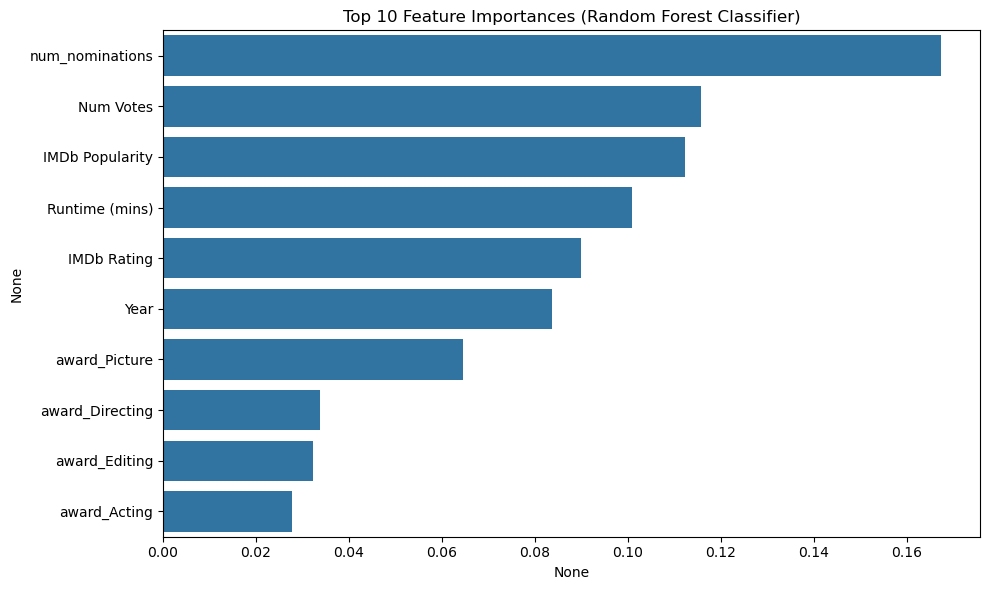

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is `df`
# 🧹 Drop non-informative or identifier columns
df_model = df_rolled.drop(columns=['film', 'Title'])

# 🎯 Features and target
X = df_model.drop(columns=['Oscar_Winner'])
y = df_model['Oscar_Winner']

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 🌲 Fit Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500)
rf_clf.fit(X_train, y_train)

# 🔍 Predict
y_pred = rf_clf.predict(X_test)

# 📊 Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📈 Feature Importance Plot
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances (Random Forest Classifier)")
plt.tight_layout()
plt.show()

In [86]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

In [88]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, random_state=42)

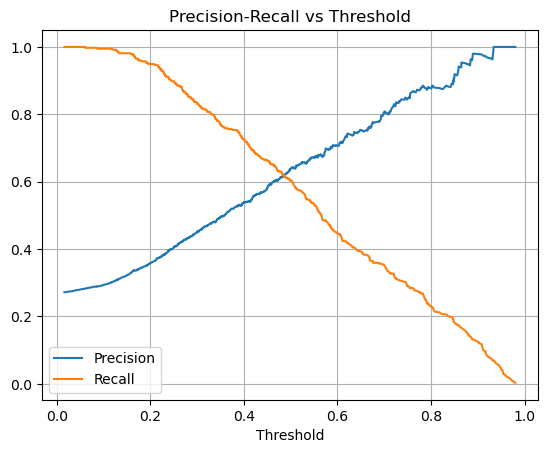

In [92]:
from sklearn.metrics import precision_recall_curve

y_probs = rf_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot to choose a better threshold
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       666
           1       0.67      0.57      0.62       249

    accuracy                           0.81       915
   macro avg       0.76      0.73      0.74       915
weighted avg       0.80      0.81      0.80       915

Confusion Matrix:
 [[598  68]
 [108 141]]


<Figure size 1000x600 with 0 Axes>

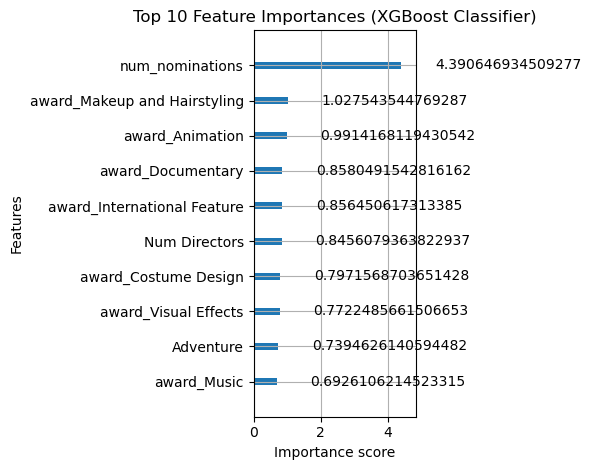

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# 🧹 Drop non-informative or identifier columns
df_model = df_rolled.drop(columns=['film', 'Title'])

# 🎯 Features and target
X = df_model.drop(columns=['Oscar_Winner'])
y = df_model['Oscar_Winner']

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🚀 Fit XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    max_depth=20,
    learning_rate=.1,
    n_estimators=1500,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # handles class imbalance
)
xgb_clf.fit(X_train, y_train)

# 🔍 Predict
y_pred = xgb_clf.predict(X_test)

# 📊 Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📈 Feature Importance Plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (XGBoost Classifier)")
plt.tight_layout()
plt.show()